In [4]:
import numpy as np
import torch
import pandas as pd
import os
from PIL import Image
from torchvision import transforms

In [5]:
dataset_dir = "/Users/chenlu/Documents/datasets/mnist/"
metadata_file = "mnist.csv"
metadata_path = os.path.join(dataset_dir, metadata_file)

metadata = pd.read_csv(metadata_path)

In [9]:
metadata["filename"][0]

'00000.png'

In [15]:
# create a tensor with all the images
images = []
transform = transforms.ToTensor()

for path in metadata["filename"]:
    img = Image.open(os.path.join(dataset_dir, path))
    tensor_image = transform(img)
    images.append(tensor_image)

all_images = torch.stack(images)

In [16]:
all_images.size()

torch.Size([70000, 1, 28, 28])

In [17]:
# normalize the all_images tensor to have zero mean and 1 std dev
all_images = all_images.float()
mean = all_images.mean()
std = all_images.std()
all_images = (all_images - mean) / std

In [22]:
print(f"mean: {mean}, std: {std}")

mean: 0.13092534244060516, std: 0.30844852328300476


In [18]:
import torch.nn.functional as F

In [19]:
# upsample the images to 32x32
upsampled_images = F.interpolate(all_images, size=32)

In [21]:
upsampled_images.size()

torch.Size([70000, 1, 32, 32])

In [23]:
import matplotlib.pyplot as plt

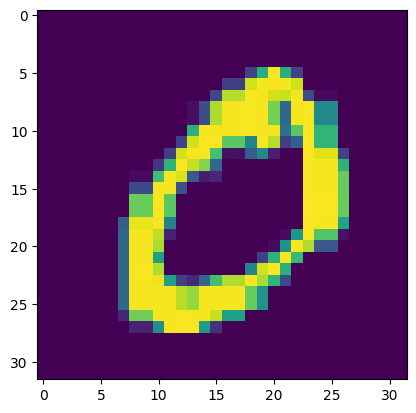

In [27]:
plt.imshow(upsampled_images[1].permute(1, 2, 0))

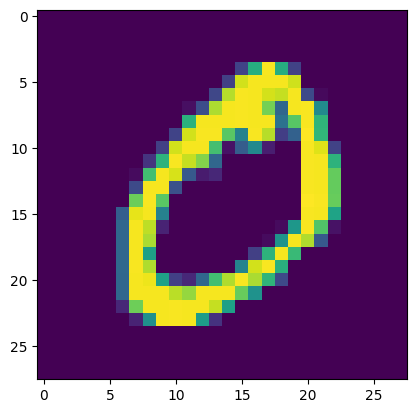

In [28]:
plt.imshow(all_images[1].permute(1, 2, 0))